<a href="https://colab.research.google.com/github/amansinghakash/GPR_VOID_PREDICTION/blob/main/UGP_GPR_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hey,
GPR- Ground Penetrating Radar data set

Checking for missing values in the dataset...
Series([], dtype: int64)
Found 1 NaN values in y_train. Dropping these rows.
Best parameters found by GridSearchCV: {'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=1))], 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=1), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}


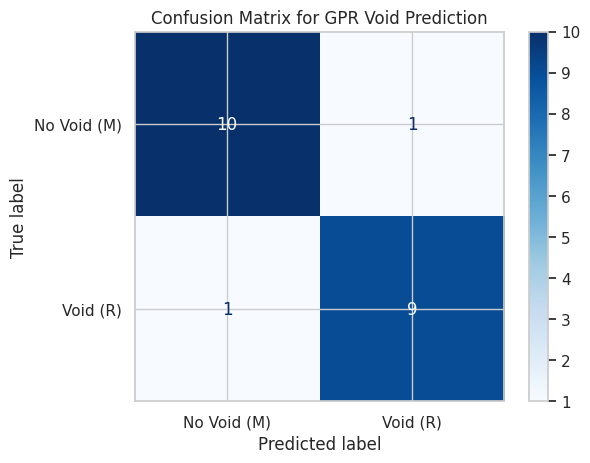

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       0.90      0.90      0.90        10

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



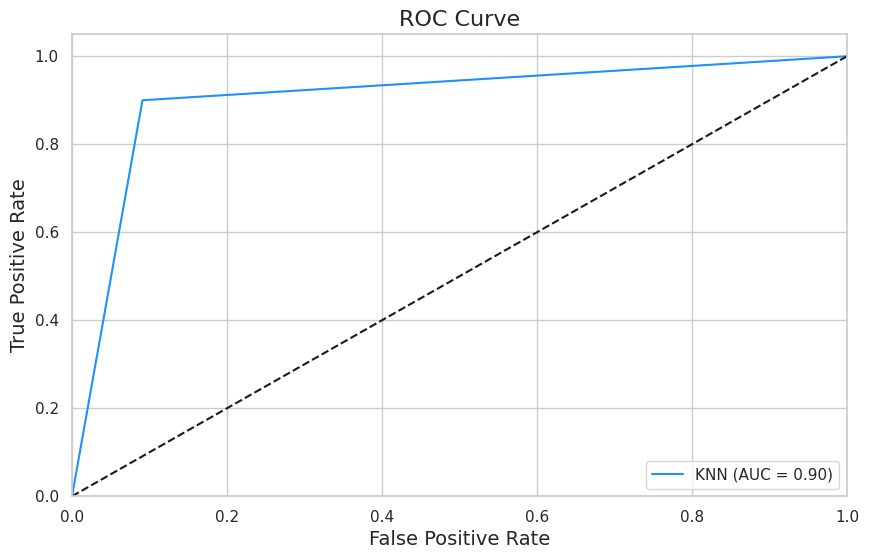

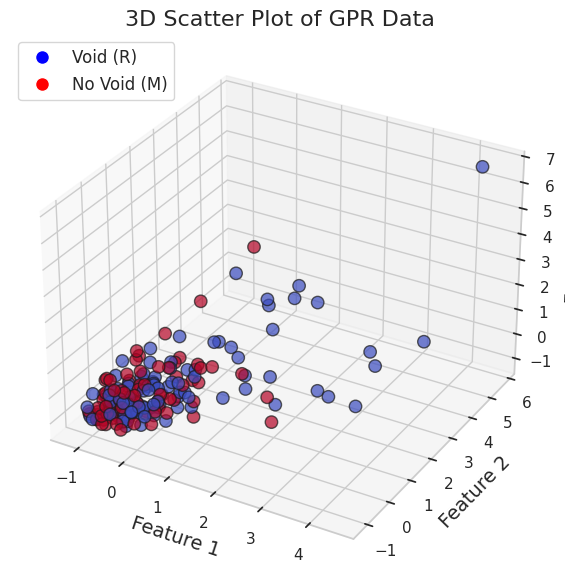


--- Thank You! ---
The model training and evaluation have been successfully completed.
We identified the optimal number of neighbors for the KNN classifier and assessed the model's performance through various metrics and visualizations.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load the dataset (replace this path with the correct path to your file)
df = pd.read_csv('sonar.all-data.csv', header=None)

# Set a seaborn style
sns.set(style="whitegrid", palette="pastel")

# Check for missing values
print("Checking for missing values in the dataset...")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# The last column is the label (R for rock, M for mine)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]  # Labels

# Convert labels to numeric: R -> 1 (Rock/Void), M -> 0 (Mine/No Void)
y = y.map({'R': 1, 'M': 0})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the pipeline with scaling and KNN
scaler = StandardScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('scaler', scaler), ('knn', knn)])

# Define the parameter grid for KNN
param_grid = {'knn__n_neighbors': list(range(1, 30))}

# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')

# Check for NaN values in y_train
if y_train.isnull().sum() > 0:
    print(f"Found {y_train.isnull().sum()} NaN values in y_train. Dropping these rows.")
    X_train = X_train[y_train.notnull()]
    y_train = y_train.dropna()

# Fit the model
grid.fit(X_train, y_train)

# Best parameters
best_params = grid.best_estimator_.get_params()
print("Best parameters found by GridSearchCV:", best_params)

# Predictions on the test set
pred = grid.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Void (M)', 'Void (R)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for GPR Void Prediction')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, pred))

# ROC Curve and AUC
y_prob = grid.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, label=f'KNN (AUC = {roc_auc:.2f})', color="dodgerblue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

# 3D Visualization of the Data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Get the scaler from the fitted pipeline
scaler_fitted = grid.best_estimator_.named_steps['scaler']

# Transform the training data for visualization
X_train_scaled = scaler_fitted.transform(X_train)

# Plotting only the first three features for visualization
scatter = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], X_train_scaled[:, 2], c=y_train, cmap='coolwarm', s=80, alpha=0.7, edgecolor='k')

# Customize plot labels and title
ax.set_title('3D Scatter Plot of GPR Data', fontsize=16)
ax.set_xlabel('Feature 1', fontsize=14)
ax.set_ylabel('Feature 2', fontsize=14)
ax.set_zlabel('Feature 3', fontsize=14)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Void (R)', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='No Void (M)', markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

plt.show()

# Final presentation
print("\n--- Thank You! ---")
print("The model training and evaluation have been successfully completed.")
print("We identified the optimal number of neighbors for the KNN classifier and assessed the model's performance through various metrics and visualizations.")


Checking for missing values in the dataset...
Series([], dtype: int64)
Checking for NaN values after conversion...
X_train NaN values: 0
X_test NaN values: 0
Best parameters found by GridSearchCV: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight

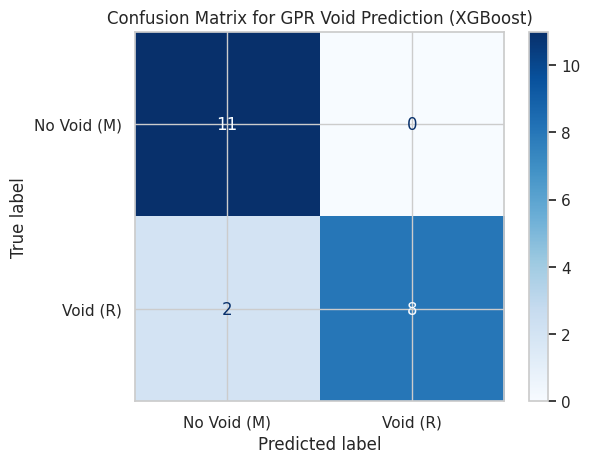

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        11
         1.0       1.00      0.80      0.89        10

    accuracy                           0.90        21
   macro avg       0.92      0.90      0.90        21
weighted avg       0.92      0.90      0.90        21



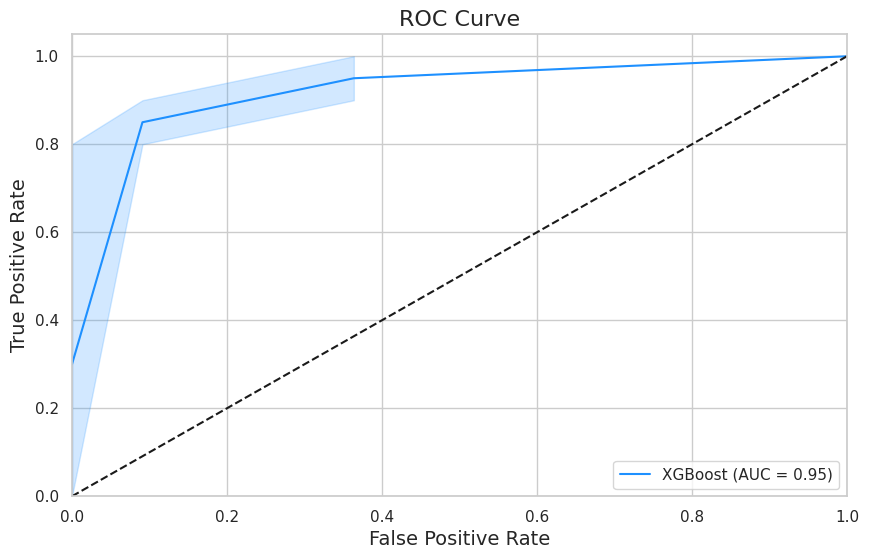

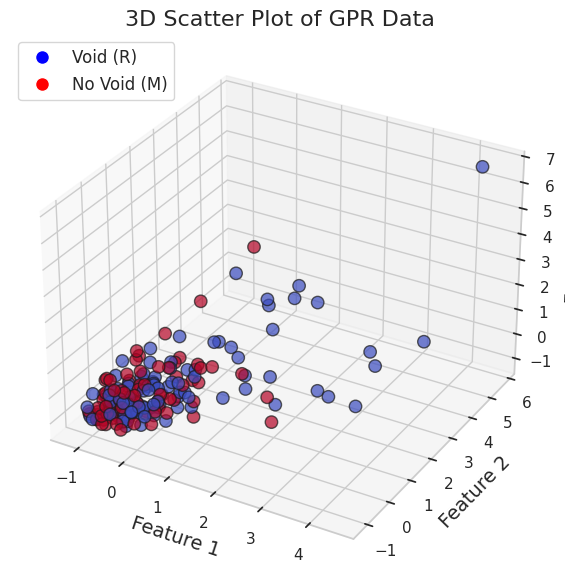


--- Thank You! ---
The model training and evaluation have been successfully completed.
We identified the optimal hyperparameters for the XGBoost classifier and assessed the model's performance through various metrics and visualizations.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, roc_curve, roc_auc_score)
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('sonar.all-data.csv', header=None)

# Set a seaborn style
sns.set(style="whitegrid", palette="pastel")

# Check for missing values
print("Checking for missing values in the dataset...")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Features and labels
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Labels

# Convert labels to numeric
y = y.map({'R': 1, 'M': 0})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Drop rows with NaN values in y_train
valid_indices = y_train.notnull()
X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# Convert categorical features to numeric if necessary
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Check for NaN values again
print("Checking for NaN values after conversion...")
print("X_train NaN values:", X_train.isnull().sum().sum())
print("X_test NaN values:", X_test.isnull().sum().sum())

# Initialize and configure the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Perform grid search to optimize hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0]
}

grid = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid.fit(X_train, y_train)

# Best parameters
best_params = grid.best_estimator_.get_params()
print("Best parameters found by GridSearchCV:", best_params)

# Predictions on the test set
pred = grid.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Void (M)', 'Void (R)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for GPR Void Prediction (XGBoost)')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, pred))

# ROC Curve and AUC
y_prob = grid.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color="dodgerblue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

# 3D Visualization of the Data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scale the features for visualization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Plotting only the first three features for visualization
scatter = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], X_train_scaled[:, 2],
                     c=y_train, cmap='coolwarm', s=80, alpha=0.7, edgecolor='k')

# Customize plot labels and title
ax.set_title('3D Scatter Plot of GPR Data', fontsize=16)
ax.set_xlabel('Feature 1', fontsize=14)
ax.set_ylabel('Feature 2', fontsize=14)
ax.set_zlabel('Feature 3', fontsize=14)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Void (R)', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='No Void (M)', markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

plt.show()

# Final presentation
print("\n--- Thank You! ---")
print("The model training and evaluation have been successfully completed.")
print("We identified the optimal hyperparameters for the XGBoost classifier and assessed the model's performance through various metrics and visualizations.")


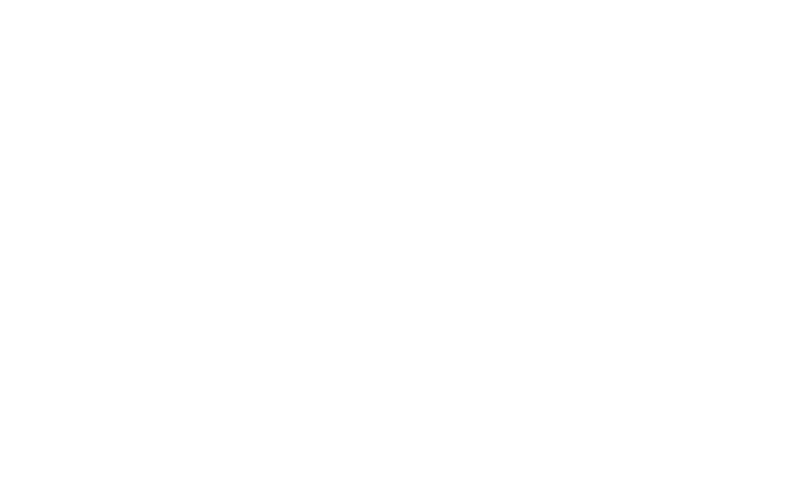

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Hide the axes

# Create a list of text strings to animate
texts = [
    "--- Thank You! ---",
    "The model training and evaluation have been successfully completed.",
    "We identified the optimal hyperparameters for the XGBoost classifier.",
    "Model performance assessed through various metrics and visualizations."
]

# Initialize the text display
text = ax.text(0.5, 0.5, "", fontsize=18, ha='center', va='center', color='dodgerblue')

# Animation function
def animate(i):
    if i < len(texts):
        text.set_text(texts[i])
    return text,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(texts), interval=2000, repeat=False)

# Display the animation
plt.show()

# Save the animation if desired
ani.save("final_presentation_animation.mp4", writer='ffmpeg')
